In [2]:
# HIDDEN
from datascience import *
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
np.set_printoptions(threshold=50)

Data come in many forms that are not numerical. Data can be pieces of music, or places on a map. They can also be categories into which you can place individuals. Here are some examples of *categorical* variables.

- The individuals are cartons of ice-cream, and the variable is the flavor in the carton.
- The individuals are professional basketball players, and the variable is the player's team.
- The individuals are years, and the variable is the genre of the highest grossing movie of the year.
- The individuals are survey respondents, and the variable is the response they choose from among "Not at all satisfied," "Somewhat satisfied," and "Very satisfied."

The table `icecream` contains data on 30 cartons of ice-cream. 

In [3]:
icecream = Table().with_columns(
    'Flavor',
    make_array(
        'Chocolate',
        'Vanilla',
        'Vanilla',
        'Vanilla',
        'Strawberry',
        'Chocolate',
        'Chocolate',
        'Chocolate',
        'Vanilla',
        'Vanilla',
        'Chocolate',
        'Strawberry',
        'Chocolate',
        'Chocolate',
        'Chocolate',
        'Chocolate',
        'Strawberry',
        'Strawberry',
        'Vanilla',
        'Chocolate',
        'Chocolate',
        'Strawberry',
        'Chocolate',
        'Vanilla',
        'Vanilla',
        'Chocolate',
        'Chocolate',
        'Chocolate',
        'Chocolate',
        'Vanilla',
    ))
icecream

Flavor
Chocolate
Vanilla
Vanilla
Vanilla
Strawberry
Chocolate
Chocolate
Chocolate
Vanilla
Vanilla


The *values* or *categories* of the categorical variable "flavor" are chocolate, strawberry, and vanilla. Each row in the table represents one carton with one of these flavors.

### Bar Charts
The bar chart is a familiar way of visualizing count distributions of categorical variables. It counts the number of copies of each category and displays a bar for each category. The bars are equally spaced and equally wide. The length of each bar is proportional to the count of the corresponding category.

In order to count the copies of each category, Python "groups" the individuals by category. (We will see how to do this ourselves later.) We will draw bar charts with horizontal bars because it's easier to label the bars that way. The Table method to create a bar chart from a table of individuals is therefore called `group_barh`.

`group_barh` takes one argument: the label of the column containing the categories.

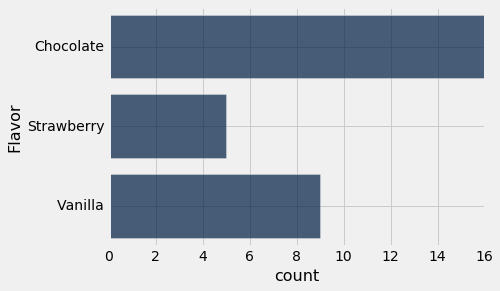

In [4]:
icecream.group_barh('Flavor')

### Features of Categorical Distributions
Apart from purely visual differences, there is an important fundamental distinction between bar charts and the other two graphs that we saw earlier in this textbook. Those were the scatter plot and the line plot, both of which display two numerical variables – the variables on both axes are numerical. In contrast, the bar chart has categories on one axis and numerical counts or frequencies on the other.

This has consequences for the chart.

#### The area principle
First, the width of each bar and the space between consecutive bars is entirely up to the person who is producing the graph, or to the program being used to produce it. Python made those choices for us. If you were to draw the bar graph by hand, you could make completely different choices and still have a perfectly correct bar graph, provided you drew all the bars with the same width and kept all the spaces the same.

Why do the widths need to be the same?  When humans look at bar charts, we generally interpret larger *areas* as indicating larger categories.  Compare, for example, the following chart with the one above:

![Bar chart with Vanilla stretched](/images/bar_chart_stretched.png)

We have made the bar for vanilla artificially wide.  You would probably infer from this chart that there are more vanilla cartons than chocolate or strawberry, because the area of that bar is largest.

There is usually no reason to vary widths of bars in a bar chart, so generally we keep all the widths the same and allow the lengths of the bars to determine their areas.

#### Ordering the bars
In addition, the bars can be drawn in any order. The categories "chocolate," "vanilla," and "strawberry" have no universal rank order, unlike for example the numbers 5, 7, and 10.

This means that we can draw a bar chart that is easier to interpret, by rearranging the bars in decreasing order. To do this, we will need a few more computational tools.  We will review these tools in more detail later, so this is just a preview.

#### Sorting the rows of a table
Tables have a method called `sort`.  Given the label of a column, `sort` returns a copy of the table where the rows have been sorted in increasing order according to the values in that column.

In [6]:
flowers = Table().with_columns(
    'Number of petals', make_array(8, 34, 5),
    'Name', make_array('lotus', 'sunflower', 'rose')
)
flowers

Number of petals,Name
8,lotus
34,sunflower
5,rose


In [7]:
flowers.sort("Number of petals")

Number of petals,Name
5,rose
8,lotus
34,sunflower


Notice that `sort` doesn't just sort the given column; it sorts the whole table.  Since each row represents one individual (one flower, in this case), it usually wouldn't make sense to sort the elements of a column and leave other columns alone.

We can pass the *named argument* `descending=True` to `sort` to reverse the sort order, which is useful for sorting bars.

In [8]:
flowers.sort("Number of petals", descending=True)

Number of petals,Name
34,sunflower
8,lotus
5,rose


#### Counting unique values of a column
Tables have a method called `group` that allows us to count the number of copies of each value in a column.  Recall that the `icecream` table has one row for each carton, and the flavors are repeated many times.

In [9]:
icecream.group("Flavor")

Flavor,count
Chocolate,16
Strawberry,5
Vanilla,9


`group` returns a new table with two columns: The given column we are "grouping by," and a column called "count" that tells us the number of copies of each unique value in the given column in the original table.

#### Creating a bar chart with customized bar lengths
The method `group_barh` allows us to make a bar chart describing the distribution of elements in one column of a table.  In principle, a chart with bars could describe other things.  When we need to, we can do a bit of extra work to directly control the lengths of the bars using the table method `barh`.

`barh` takes two arguments.  The first argument is the name of a column that contains the category names, and there will be one bar for each element of that column.  The second argument is the name of a column that contains numbers, and the length of each bar will be the value in that column.

For example, we could use our `flowers` table to make a bar chart:

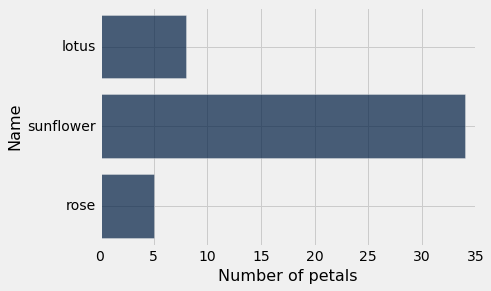

In [11]:
flowers.barh("Name", "Number of petals")

Notice that this is **not** a bar chart that describes a distribution.  There aren't 5 copies of rose anywhere.  Rather, the lengths of the bars just tell us how many petals each flower has.

If you look back at the `flowers` table, you might also notice that the bars appear in the same order as the rows in the table.  This allows us to control the order of the bars.

#### Ordering the bars, continued
Now we are ready to make a bar chart with ordered bars for our ice cream data.  When tackling a problem like this, it is useful to work backwards, starting from what we want.

* We want to make a bar chart of the flavors, starting with the most common flavors on top.
* If we have a table telling us the count of each flavor, sorted in decreasing order by count, we can use `barh` to make a bar chart.
* If we have a table telling us the count of each flavor, we can sort it in decreasing order by count with `sort`.
* If we have a table of the individual cartons, we can use `group` to make a table telling us the count of each flavor.
* We have a table of the individual cartons - `icecream`.

Now we can implement this:

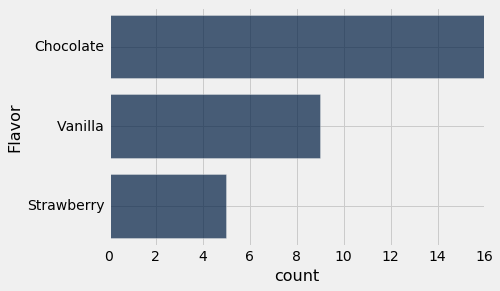

In [16]:
icecream.group('Flavor').sort('count', descending=True).barh('Flavor', 'count')

This bar chart contains exactly the same information as the one we made earlier using `group_barh`, but it is a little easier to read. While this is not a huge gain in reading a chart with just three bars, it can be quite significant when the number of categories is large.

### Example: Movies
The table `top` consists of U.S.A.'s top grossing movies of all time. The first column contains the title of the movie; *Star Wars: The Force Awakens* has the top rank, with a box office gross amount of more than 900 million dollars in the United States. The second column contains the name of the studio that produced the movie. The third contains the domestic box office gross in dollars, and the fourth contains the  gross amount that would have been earned from ticket sales at 2016 prices. The fifth contains the release year of the movie. 

There are 200 movies in the table. Python will show the first ten, so we can sort by gross receipts to see the movies with the ten highest gross receipts.

In [14]:
top = Table.read_table('top_movies.csv')
top.sort('Gross', descending=True)

Title,Studio,Gross,Gross (Adjusted),Year
Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
Avatar,Fox,760507625,846120800,2009
Titanic,Paramount,658672302,1178627900,1997
Jurassic World,Universal,652270625,687728000,2015
Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
The Dark Knight,Warner Bros.,534858444,647761600,2008
Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
Star Wars,Fox,460998007,1549640500,1977
Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


The Disney subsidiary Buena Vista shows up frequently in the top ten, as do Fox and Warner Brothers. Which studios will appear most frequently if we look among all 200 rows?

We can use `group_barh` to make a simple bar chart of the distribution of studios.

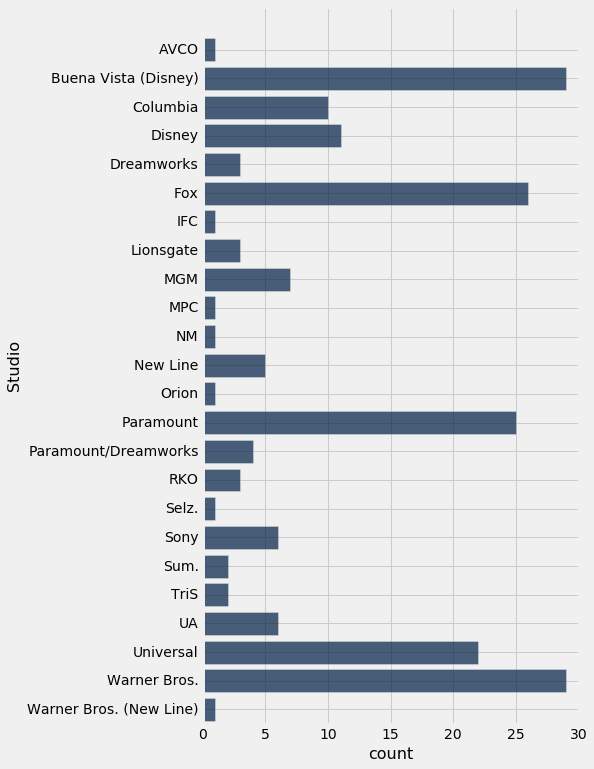

In [17]:
top.group_barh('Studio')

It is a bit hard to read this, so let's use the more complicated method to sort the bars.  We will take it one step at a time, though we could do it all in one line.

In [19]:
by_studio = top.group('Studio')
by_studio

Studio,count
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7
MPC,1


In [20]:
sorted_by_count = by_studio.sort('count', descending=True)
sorted_by_count

Studio,count
Warner Bros.,29
Buena Vista (Disney),29
Fox,26
Paramount,25
Universal,22
Disney,11
Columbia,10
MGM,7
UA,6
Sony,6


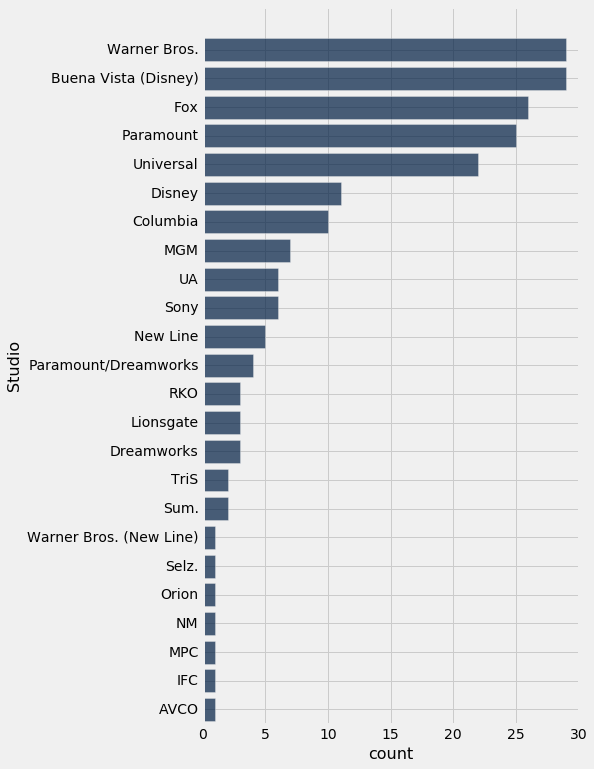

In [21]:
sorted_by_count.barh('Studio', 'count')

Warner Brothers and Buena Vista are the most common studios among the top 200 movies. Warner Brothers produces the Harry Potter movies and Buena Vista produces Star Wars. 

### Proportions
The Warner Brothers and Buena Vista bars look big, but there are many other studios with bars.  The chart doesn't let us easily answer questions like:

> "Are most of the top 200 movies produced by Warner Brothers?  What proportion do they produce?"

For this, we can make a bar chart displaying proportions rather than counts.  The proportion of movies made by a studio is:

$$\frac{\text{Number of movies made by the studio} } {\text{Total number of movies in the dataset} }$$

We can use array arithmetic to compute these proportions for each studio.

In [25]:
studio_proportions = sorted_by_count.column("count") / sum(sorted_by_count.column("count"))
studio_proportions

array([ 0.145,  0.145,  0.13 ,  0.125,  0.11 ,  0.055,  0.05 ,  0.035,
        0.03 ,  0.03 ,  0.025,  0.02 ,  0.015,  0.015,  0.015,  0.01 ,
        0.01 ,  0.005,  0.005,  0.005,  0.005,  0.005,  0.005,  0.005])

Then we can add the proportions as a new column in our table:

In [27]:
with_proportions = sorted_by_count.with_columns("Proportion", studio_proportions)
with_proportions

Studio,count,Proportion
Warner Bros.,29,0.145
Buena Vista (Disney),29,0.145
Fox,26,0.13
Paramount,25,0.125
Universal,22,0.11
Disney,11,0.055
Columbia,10,0.05
MGM,7,0.035
UA,6,0.03
Sony,6,0.03


Finally, we can make a bar chart with bar lengths based on these proportions.

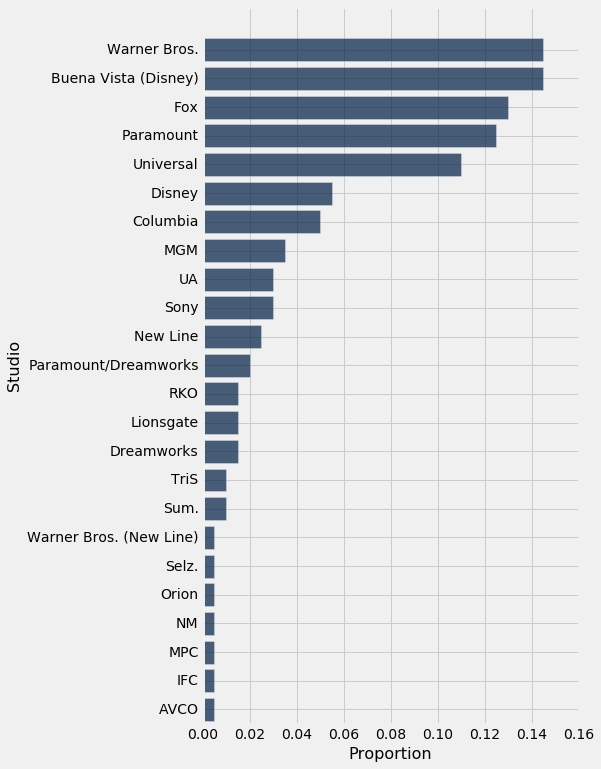

In [28]:
with_proportions.barh("Studio", "Proportion")

Now it is easier to see that only around .14 (14%) of the movies are produced by Warner Brothers.

### Towards numerical variables ###
Because total gross receipts are being measured in unadjusted dollars, it is not very surprising that the top movies are more frequently from recent years than from bygone decades. In absolute terms, movie tickets cost more now than they used to, and thus gross receipts are higher. This is borne out by a bar chart that show the distribution of the 200 movies by year of release.

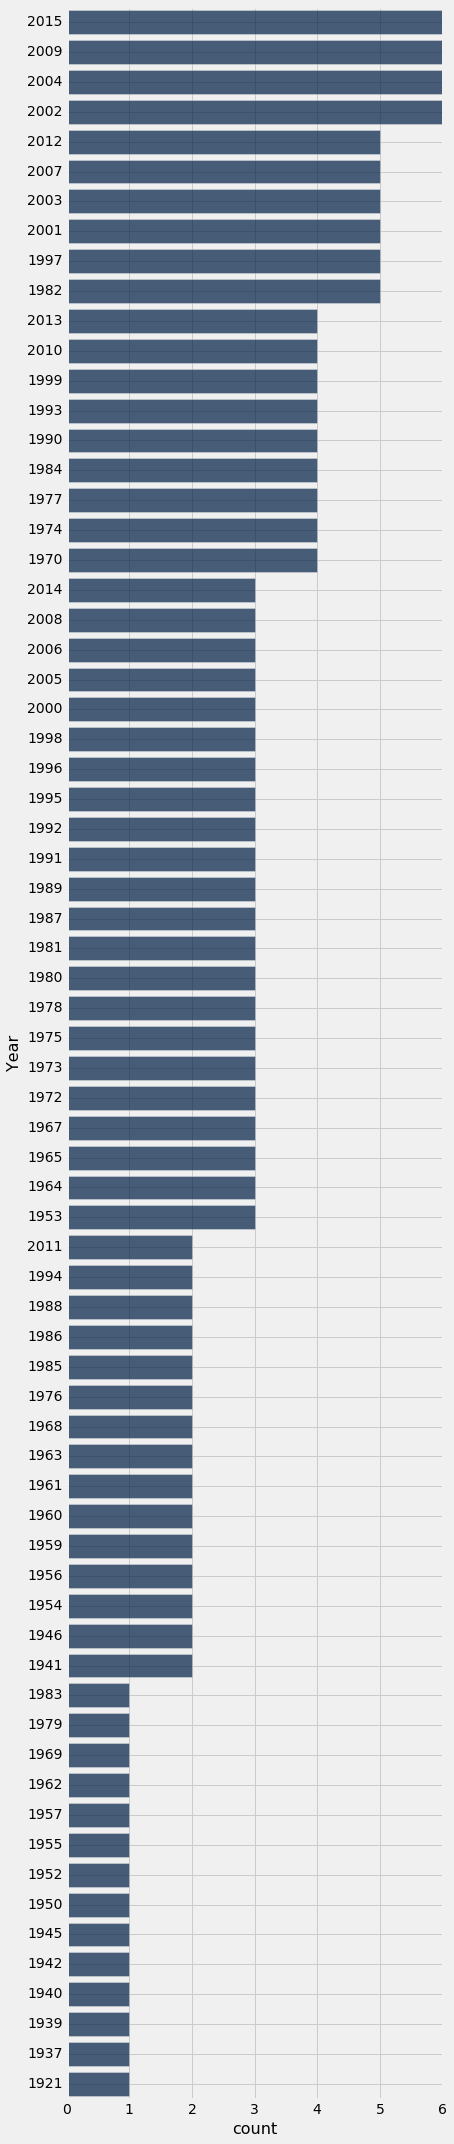

In [29]:
top.group('Year').sort('count', descending=True).barh('Year', 'count')

All of the longest bars correspond to years after 2000. This is consistent with our prediction that recent years should be among the most frequent.

There is something unsettling about this chart. Though it does answer the question of which release years appear most frequently among the 200 top grossing movies, it doesn't list all the years in chronological order. It is treating `Year` as a categorical variable. 

But years are fixed chronological units that do have an order. They also have fixed numerical spacings relative to each other. Let's see what happens when we try to take that into account.

By default, `group` and `group_barh` sort the categories (years) from lowest to highest. So we will run the code without sorting by count. 

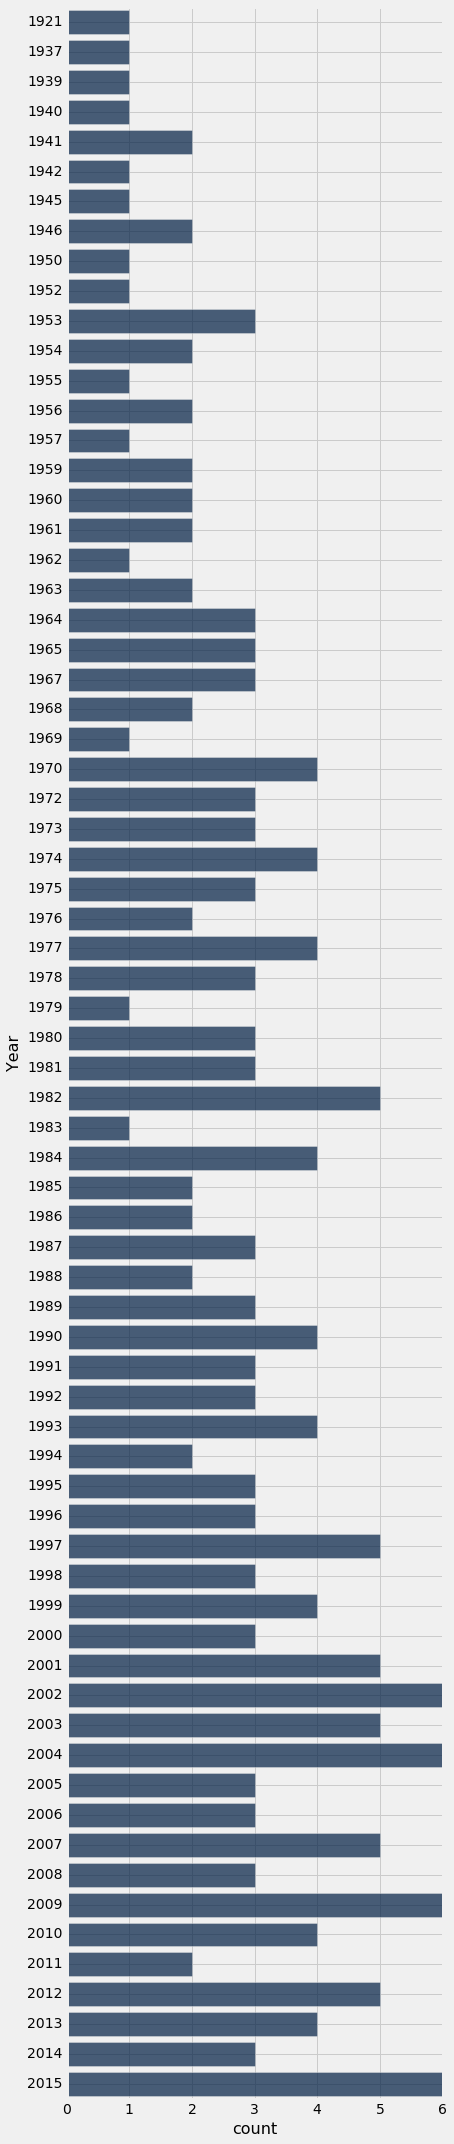

In [31]:
top.group_barh('Year')

Now the years are in increasing order. But there is still something disquieting about this bar chart. The bars at 1921 and 1937 are just as far apart from each other as the bars at 1937 and 1939. The bar chart doesn't include a blank space to show that none of the 200 movies were released in the years 1922 through 1936, nor in 1938. Such inconsistencies and omissions make the distribution in the early years hard to understand based on this visualization.

Bar charts are intended as visualizations of categorical variables. When the variable is numerical, the numerical relations between its values have to be taken into account when we create visualizations. That is the topic of the next section.